In [2]:
from numpy import linspace, sin, cos
from numpy import array, concatenate

In [3]:
ωm = 27777.78
ωs = [22222.22, 23333.33, 22444.44, 22266.67, 22231.11, 22224.00]

In [4]:
Ta = Ts = 2
T = IT = 0.5

T0 = 0
Tf = Ta + 6*(T + IT) + Ts + 10*0.25

δt = 0.00001
n = int(Tf/δt) + 1

ts = linspace(T0, Tf, n)

tm = linspace(T0, Ta - δt, int(Ta/δt))
t1 = linspace(Ta + 0*(T + IT), Ta + 1*(T + IT) - δt, int((T + IT)/δt))
t2 = linspace(Ta + 1*(T + IT), Ta + 2*(T + IT) - δt, int((T + IT)/δt))
t3 = linspace(Ta + 2*(T + IT), Ta + 3*(T + IT) - δt, int((T + IT)/δt))
t4 = linspace(Ta + 3*(T + IT), Ta + 4*(T + IT) - δt, int((T + IT)/δt))
t5 = linspace(Ta + 4*(T + IT), Ta + 5*(T + IT) - δt, int((T + IT)/δt))
t6 = linspace(Ta + 5*(T + IT), Ta + 6*(T + IT) - δt, int((T + IT)/δt))
tw = linspace(Ta + 6*(T + IT), Ta + 6*(T + IT) + Ts - δt, int(Ts/δt))
tmeas = linspace(Ta + 6*(T + IT) + Ts, Tf, int(10*0.25/δt) + 1)

In [5]:
tm, t1, t2, t3, t4, t5, t6, tw, tmeas

(array([0.000000e+00, 1.000005e-05, 2.000010e-05, ..., 1.999970e+00,
        1.999980e+00, 1.999990e+00]),
 array([2.     , 2.00001, 2.00002, ..., 2.99997, 2.99998, 2.99999]),
 array([3.     , 3.00001, 3.00002, ..., 3.99997, 3.99998, 3.99999]),
 array([4.     , 4.00001, 4.00002, ..., 4.99997, 4.99998, 4.99999]),
 array([5.     , 5.00001, 5.00002, ..., 5.99997, 5.99998, 5.99999]),
 array([6.     , 6.00001, 6.00002, ..., 6.99997, 6.99998, 6.99999]),
 array([7.     , 7.00001, 7.00002, ..., 7.99997, 7.99998, 7.99999]),
 array([8.     , 8.00001, 8.00002, ..., 9.99997, 9.99998, 9.99999]),
 array([10.     , 10.00001, 10.00002, ..., 12.49998, 12.49999, 12.5    ]))

In [6]:
maj_ton = lambda ts: sin(ωm*ts)
tone1   = lambda ts: sin(ωs[0]*ts)
tone2   = lambda ts: sin(ωs[1]*ts)
tone3   = lambda ts: sin(ωs[2]*ts)
tone4   = lambda ts: sin(ωs[3]*ts)
tone5   = lambda ts: sin(ωs[4]*ts)
tone6   = lambda ts: sin(ωs[5]*ts)

In [7]:
sm = maj_ton(tm)
s1 = maj_ton(t1) + tone1(t1)
s2 = maj_ton(t2) + tone1(t2)
s3 = maj_ton(t3) + tone1(t3)
s4 = maj_ton(t4) + tone1(t4)
s5 = maj_ton(t5) + tone1(t5)
s6 = maj_ton(t6) + tone1(t6)
sw = maj_ton(tw)
smeas = maj_ton(tmeas)

In [8]:
from matplotlib.pyplot import figure, rcParams
from conf_matplotlib import conf_matplotlib_oscuro
conf_matplotlib_oscuro()

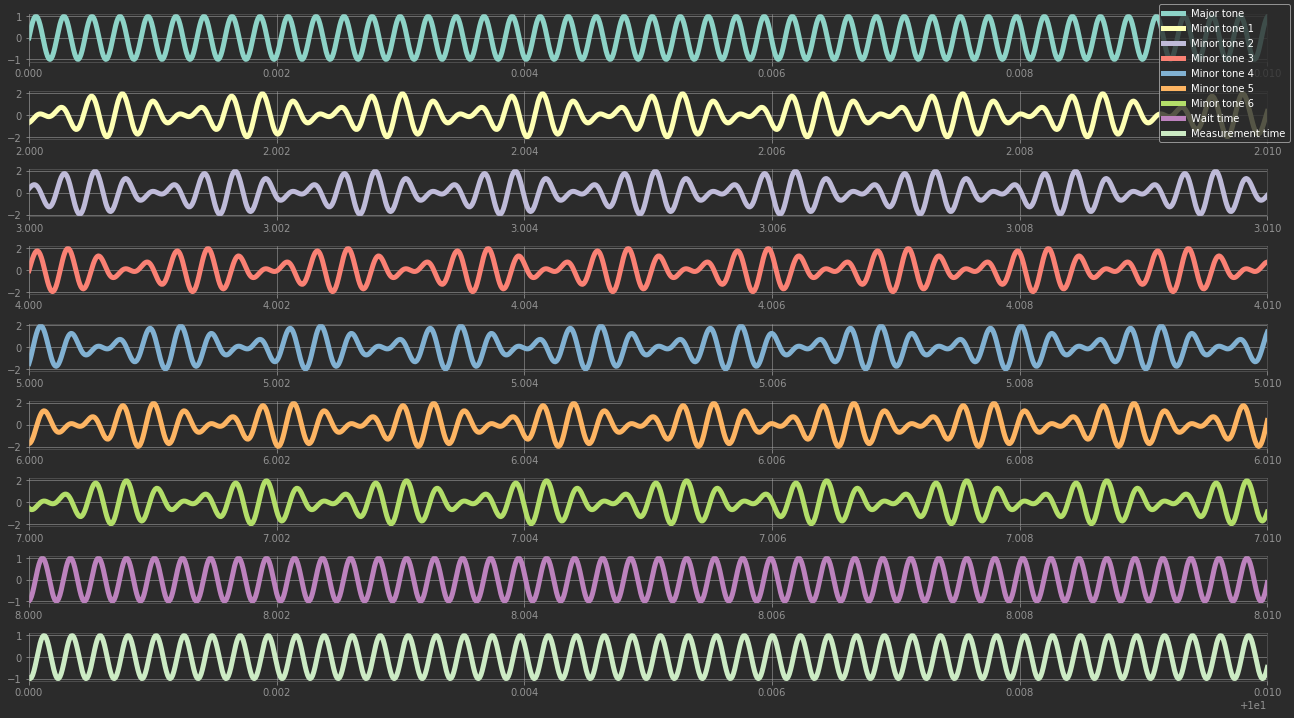

In [9]:
fig = figure(figsize=(18,10))
axm, ax1, ax2, ax3, ax4, ax5, ax6, axw, axmeas = fig.subplots(9, 1, gridspec_kw={'height_ratios': [1,1,1,1,1,1,1,1,1]})

cycle = rcParams['axes.prop_cycle'].by_key()['color']

axm.plot(tm, sm, c=cycle[0], label=r"Major tone")
ax1.plot(t1, s1, c=cycle[1], label=r"Minor tone 1")
ax2.plot(t2, s2, c=cycle[2], label=r"Minor tone 2")
ax3.plot(t3, s3, c=cycle[3], label=r"Minor tone 3")
ax4.plot(t4, s4, c=cycle[4], label=r"Minor tone 4")
ax5.plot(t5, s5, c=cycle[5], label=r"Minor tone 5")
ax6.plot(t6, s6, c=cycle[6], label=r"Minor tone 6")
axw.plot(tw, sw, c=cycle[7], label=r"Wait time")
axmeas.plot(tmeas, smeas, c=cycle[8], label=r"Measurement time")

axm.set_xlim(tm[0], tm[0] + 0.01)
ax1.set_xlim(t1[0], t1[0] + 0.01)
ax2.set_xlim(t2[0], t2[0] + 0.01)
ax3.set_xlim(t3[0], t3[0] + 0.01)
ax4.set_xlim(t4[0], t4[0] + 0.01)
ax5.set_xlim(t5[0], t5[0] + 0.01)
ax6.set_xlim(t6[0], t6[0] + 0.01)
axw.set_xlim(tw[0], tw[0] + 0.01)
axmeas.set_xlim(tmeas[0], tmeas[0] + 0.01)

fig.legend()
fig.tight_layout();

In [10]:
ts = concatenate([tm, t1, t2, t3, t4, t5, t6, tw, tmeas])
ss = concatenate([sm, s1, s2, s3, s4, s5, s6, sw, smeas])

In [11]:
tmeas[0]

10.0

In [12]:
from control import NonlinearIOSystem, input_output_response, InterconnectedSystem
from control import pade, tf, forced_response
from scipy.constants import c

In [13]:
delay = 36500000/c
delay

0.12175089474732549

In [45]:
num, den = pade(T=delay, n=10)
sis_ret = tf(num, den)
sis_ret


s^10 - 903.5 s^9 + 4.007e+05 s^8 - 1.141e+08 s^7 + 2.296e+10 s^6 - 3.395e+12 s^5 + 3.717e+14 s^4 - 2.966e+16 s^3 + 1.644e+18 s^2 - 5.703e+19 s + 9.368e+20
----------------------------------------------------------------------------------------------------------------------------------------------------------
s^10 + 903.5 s^9 + 4.007e+05 s^8 + 1.141e+08 s^7 + 2.296e+10 s^6 + 3.395e+12 s^5 + 3.717e+14 s^4 + 2.966e+16 s^3 + 1.644e+18 s^2 + 5.703e+19 s + 9.368e+20

In [46]:
to, so, xo = forced_response(sis_ret, ts, ss, 0)

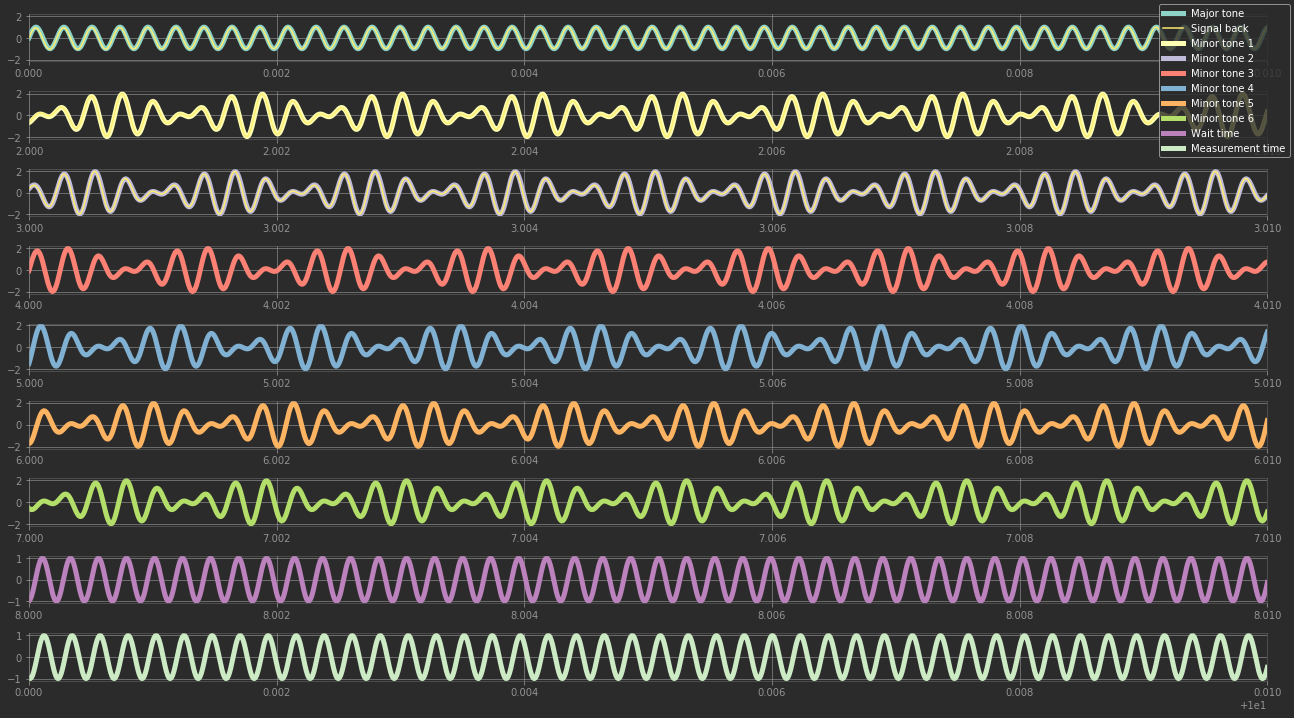

In [49]:
fig = figure(figsize=(18,10))
axm, ax1, ax2, ax3, ax4, ax5, ax6, axw, axmeas = fig.subplots(9, 1, gridspec_kw={'height_ratios': [1,1,1,1,1,1,1,1,1]})

cycle = rcParams['axes.prop_cycle'].by_key()['color']

axm.plot(tm, sm, c=cycle[0], label=r"Major tone")
axm.plot(to, so, c=cycle[9], label=r"Signal back", lw=1.5)
ax1.plot(t1, s1, c=cycle[1], label=r"Minor tone 1")
ax1.plot(to, so, c=cycle[9], lw=1.5)
ax2.plot(t2, s2, c=cycle[2], label=r"Minor tone 2")
ax2.plot(to, so, c=cycle[9], lw=1.5)
ax3.plot(t3, s3, c=cycle[3], label=r"Minor tone 3")
ax4.plot(t4, s4, c=cycle[4], label=r"Minor tone 4")
ax5.plot(t5, s5, c=cycle[5], label=r"Minor tone 5")
ax6.plot(t6, s6, c=cycle[6], label=r"Minor tone 6")
axw.plot(tw, sw, c=cycle[7], label=r"Wait time")
axmeas.plot(tmeas, smeas, c=cycle[8], label=r"Measurement time")

axm.set_xlim(tm[0], tm[0] + 0.01)
ax1.set_xlim(t1[0], t1[0] + 0.01)
ax2.set_xlim(t2[0], t2[0] + 0.01)
ax3.set_xlim(t3[0], t3[0] + 0.01)
ax4.set_xlim(t4[0], t4[0] + 0.01)
ax5.set_xlim(t5[0], t5[0] + 0.01)
ax6.set_xlim(t6[0], t6[0] + 0.01)
axw.set_xlim(tw[0], tw[0] + 0.01)
axmeas.set_xlim(tmeas[0], tmeas[0] + 0.01)

fig.legend()
fig.tight_layout();

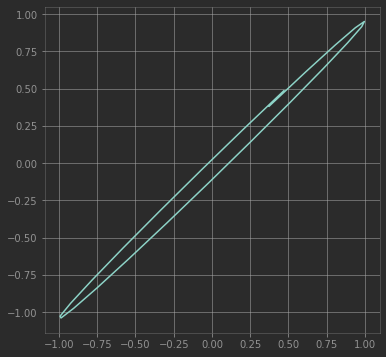

In [75]:
fig = figure(figsize=(6,6))
ax = fig.gca()
ax.plot(ss[int(0.00024/δt):int(0.00048/δt)], so[int(0.00024/δt):int(0.00048/δt)], lw=1.5)

In [66]:
from numpy import arcsin, where

In [81]:
max(so[0:int(0.00024/δt)])

0.9314071031312683

In [85]:
arcsin(0/max(so[0:int(0.00024/δt)]))

0.0

In [67]:
where(ss == 0)

(array([0]),)